# EDA of housing data

#  Full exploratory data analysis process to gain insight about a dataset
# Using provided data

# Which factors of the given data correlates most with sold price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data into a dataframe
df = pd.read_csv(r"C:\Users\Jay\Documents\important misc\EIT\EDA\raw_house_data.csv",encoding="ISO-8859-1")
print(df.shape)
df.head(5)

(5000, 16)


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


# Investigate the Data

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
MLS                 5000 non-null int64
sold_price          5000 non-null float64
zipcode             5000 non-null int64
longitude           5000 non-null float64
latitude            5000 non-null float64
lot_acres           4990 non-null float64
taxes               5000 non-null float64
year_built          5000 non-null int64
bedrooms            5000 non-null int64
bathrooms           5000 non-null object
sqrt_ft             5000 non-null object
garage              5000 non-null object
kitchen_features    5000 non-null object
fireplaces          5000 non-null object
floor_covering      5000 non-null object
HOA                 5000 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 625.1+ KB


# FIll nas with mean

In [5]:
df2 = df.fillna(df.mean())
df2.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


# Investigating Distributions using scatter_matrix

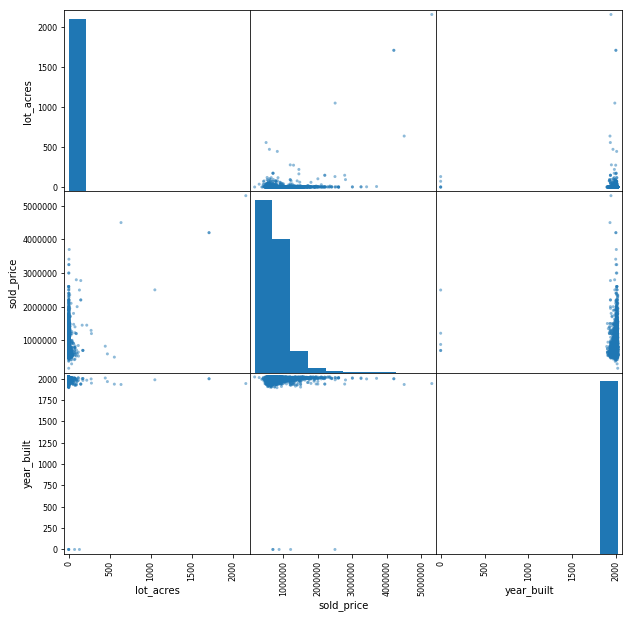

In [6]:

pd.plotting.scatter_matrix(df[['lot_acres', 'sold_price', 'HOA', 'year_built']], figsize=(10,10));

# Create a plot that shows the sold_price Distribution

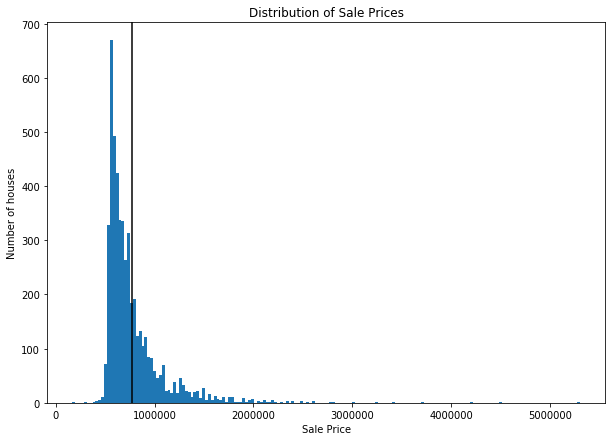

In [7]:

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df2['sold_price'], bins='auto')
ax.set_title('Distribution of Sale Prices')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Number of houses')
ax.axvline(df2['sold_price'].mean(), color='black');

# Looks like a log normal distribution; most houses in this sample are clustered around $1000000

# Create a plot that shows the bedrooms Distribution

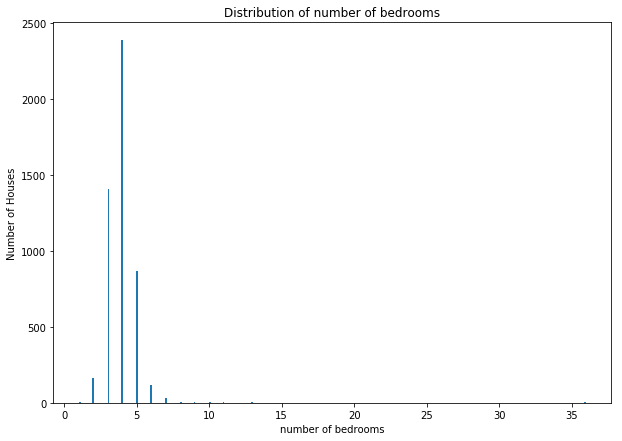

In [8]:


fig, ax = plt.subplots(figsize=(10, 7))

ax.hist(df2['bedrooms'], bins='auto');
ax.set_title('Distribution of number of bedrooms')
ax.set_xlabel('number of bedrooms')
ax.set_ylabel('Number of Houses');

# The number of rooms in houses is approximately normally distributed, 
# with a mean around 4 rooms.

# Create a Box Plot for sold_price

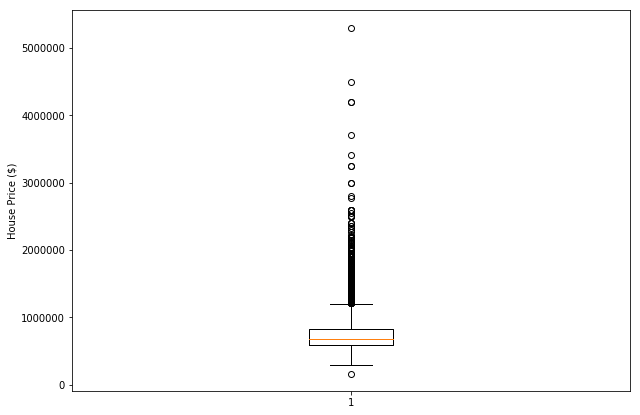

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.boxplot(df2['sold_price'])
ax.set_ylabel('House Price ($)');

## Investigation Correlations with Sale Price

In [15]:
df2.corr()['sold_price'].sort_values()

zipcode      -0.039925
longitude    -0.036819
year_built   -0.014064
taxes         0.023326
MLS           0.031019
latitude      0.035206
bedrooms      0.115932
lot_acres     0.332258
sold_price    1.000000
Name: sold_price, dtype: float64

# It looks like lot_acres and bedrooms  are most highly correlated with SalePrice.
# These features would be a good place to start for modeling
# Other investigations will vary

# Perform an Exploration of home price by bedrooms

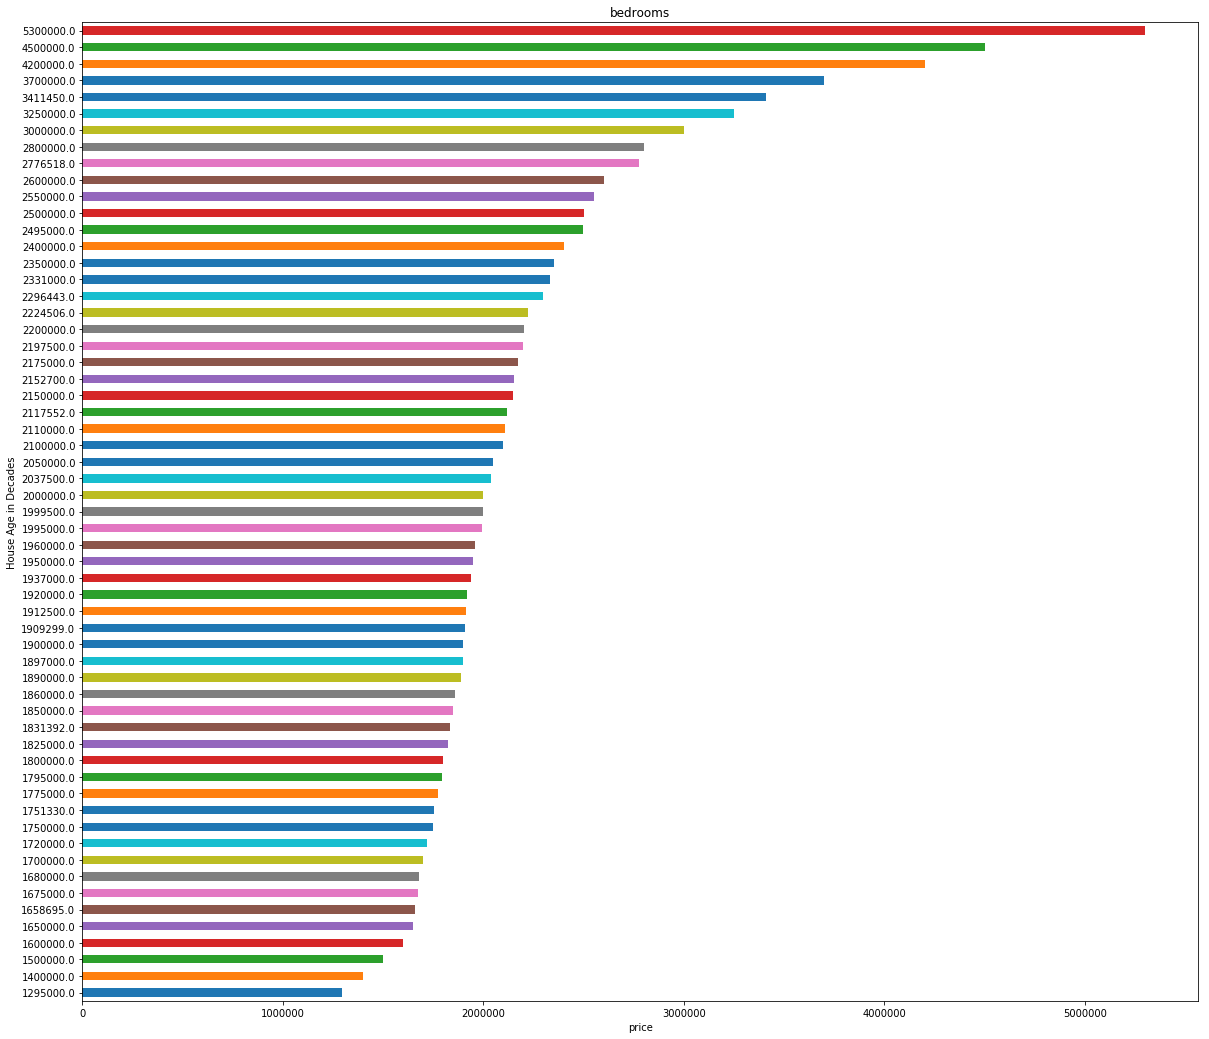

In [23]:

df2['rooms'] = df2['bedrooms'].head(100)
df2['price'] = df2['sold_price'].head(100)
to_plot = df2.groupby('price').sold_price.mean()
to_plot.plot(kind='barh', figsize=(20,18))
plt.ylabel('House Age in Decades')
plt.xlabel('price')
plt.title('bedrooms');


# Price is affected by bedrooms
